In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import math

In [2]:
df = pd.read_csv("./Data MIMIC/SERVICES.csv")#reading csv, make your the folder "Data MIMIC" and the name "SERVICES.csv" match
df.head()

,row_id,subject_id,hadm_id,transfertime,prev_service,curr_service
0,14974,10006,142345,2164-10-23 21:10:15,NaN,MED
1,14979,10011,105331,2126-08-14 22:34:00,NaN,MED
2,14981,10013,165520,2125-10-04 23:38:00,NaN,MED
3,14985,10017,199207,2149-05-26 17:21:09,NaN,MED
4,14986,10019,177759,2163-05-14 20:43:56,NaN,MED


In [3]:
df.hadm_id.count()#counting total rows

163

In [4]:
print(df.curr_service.nunique()) #unique number of services
df.curr_service.unique() #display the unique number of services

12


array(['MED', 'NMED', 'CSURG', 'SURG', 'VSURG', 'CMED', 'OMED', 'NSURG',
       'TSURG', 'TRAUM', 'ORTHO', 'GU'], dtype=object)

In [5]:
#This is just an example of how to cathegorize, for the full database go to glossary and define your own groups
group ={ 'MED':'MEDICINE','NMED':'MEDICINE','CSURG':'SURGICAL', 'SURG':'SURGICAL','VSURG':'SURGICAL','CMED':'MEDICINE',
           'OMED':'OTHER','NSURG':'SURGICAL', 'TSURG':'SURGICAL','TRAUM':'OTHER','ORTHO':'OTHER','GU':'OTHER'}
df['group'] = df.curr_service.map(group)

In [6]:
df.group.value_counts() #counts

MEDICINE    107
SURGICAL     34
OTHER        22
Name: group, dtype: int64

<BarContainer object of 3 artists>

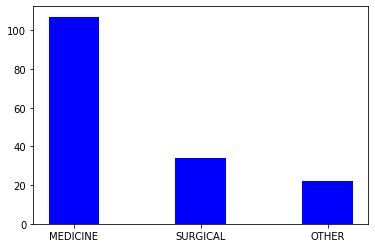

In [7]:
#Bar plot
group = list(df.group.unique()) 
values = list(df.group.value_counts()) 

fig = plt.figure()

# creating the bar plot 
plt.bar(group, values, color ='blue',  
        width = 0.4) 
